In [13]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wi
from scipy.fft import fft, ifft

Ejercicio 5

In [14]:
def integral(a, b, n, f, p):
    
    I = (f(a, p) + f(b, p))/2

    for k in range(1, n):
        I += f(a + k*(b-a)/n, p)

    I *= (b-a)/n

    return I

Ejercicio 6

In [15]:
def exp(x, p):
    return np.exp(-x**2)

In [16]:
integral(-10, 10, 10000, exp, 0)-np.sqrt(np.pi) 

np.float64(4.440892098500626e-16)

Ejercicio 7

In [17]:
def dirichlet(t, N):
    return np.sin((N+1/2)*t)/(2*np.sin(t/2))

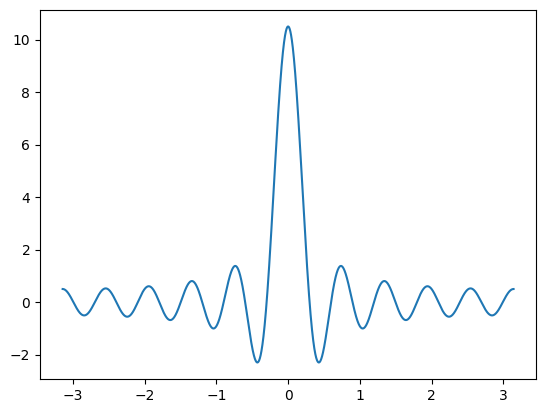

In [18]:
N = 10
t = np.arange(-np.pi, np.pi, 0.0001)
y = [dirichlet(i, N) for i in t]
plt.plot(t, y)

In [19]:
np.isclose(integral(-np.pi, np.pi, 10001, dirichlet, N)/np.pi, 1)

np.True_

Ejercicio 8

In [20]:
def coseno(x, p):
    f = p[0]
    n = p[1]
    b = p[2]
    L = p[3]
    return f(x, b)*np.cos(n*x*np.pi/L)

def seno(x, p):
    f = p[0]
    n = p[1]
    b = p[2]
    L = p[3]
    return f(x, b)*np.sin(n*x*np.pi/L)

In [21]:
def fourier(f, p, N, X, L):
    a0 = integral(-L, L, 10000, f, p)/L
    a = []
    b = []

    for i in range(1, N):
        a.append(integral(-L, L, 10000, coseno, [f,i,p,L])/L)
        b.append(integral(-L, L, 10000, seno, [f,i,p,L])/L)

    valores = []

    for x in X:
        valor = a0/2
        for i in range(0, N-1):
            valor += a[i]*np.cos((i+1)*x*np.pi/L)
            valor += b[i]*np.sin((i+1)*x*np.pi/L)
        valores.append(valor)

    return valores

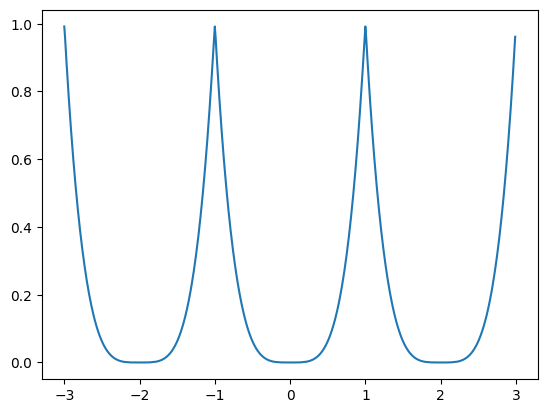

In [22]:
def func(x, p):
    return x**4

X = np.arange(-3,3,0.01)
v = fourier(func, 0, 100, X, 1)

plt.plot(X, v)

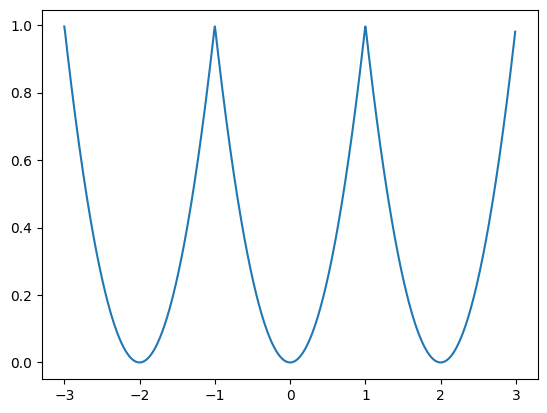

In [23]:
def func(x, p):
    return x**2

X = np.arange(-3,3,0.01)
v = fourier(func, 0, 100, X, 1)

plt.plot(X, v)

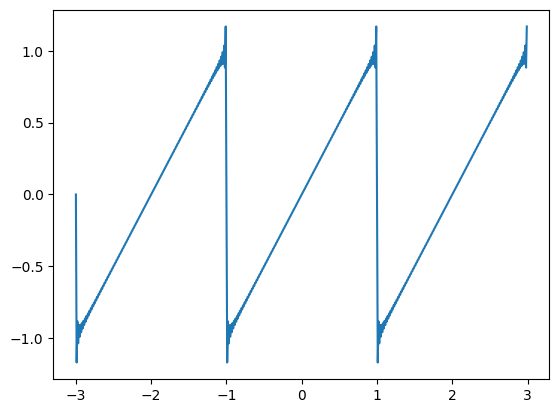

In [24]:
def func(x, p):
    return x 

X = np.arange(-3,3,0.01)
v1 = fourier(func, 0, 100, X, 1)

plt.plot(X, v1)

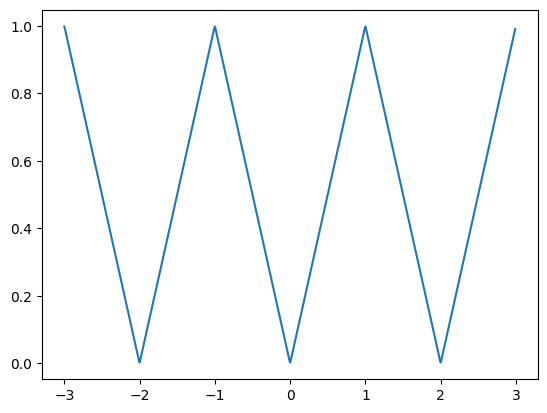

In [25]:
def func(x, p):
    return np.sqrt(x**2)

X = np.arange(-3,3,0.01)
v2 = fourier(func, 0, 100, X, 1)

plt.plot(X, v2)

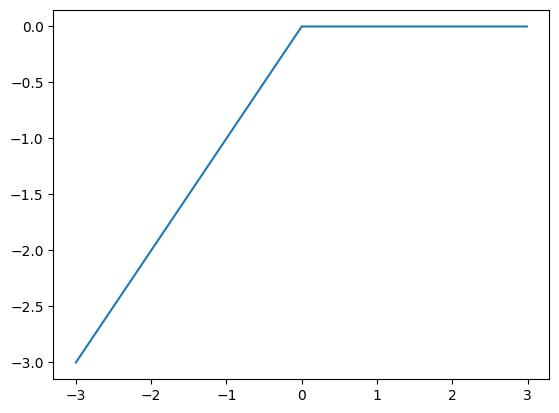

In [26]:
X = np.arange(-3,3,0.01)
X_mod = [abs(x) for x in X]
plt.plot(X, (X - X_mod)/2)

Ejercicio 11

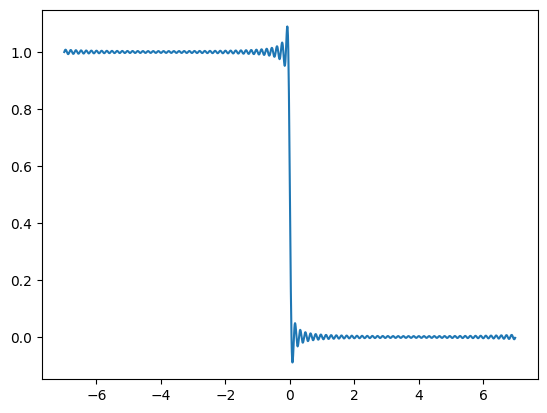

In [27]:
def func(x, p):
    if x<=0:
        return 1
    else:
        return 0
    
X = np.arange(-7,7,0.01)
v = fourier(func, 0, 100, X, 8)

plt.plot(X, v)

Ejercicio 12

In [28]:
def suma(x, N):
    res = 0
    for i in range(1, N+1):
        res += np.sin((i**2)*x)/(i**2)
    return res

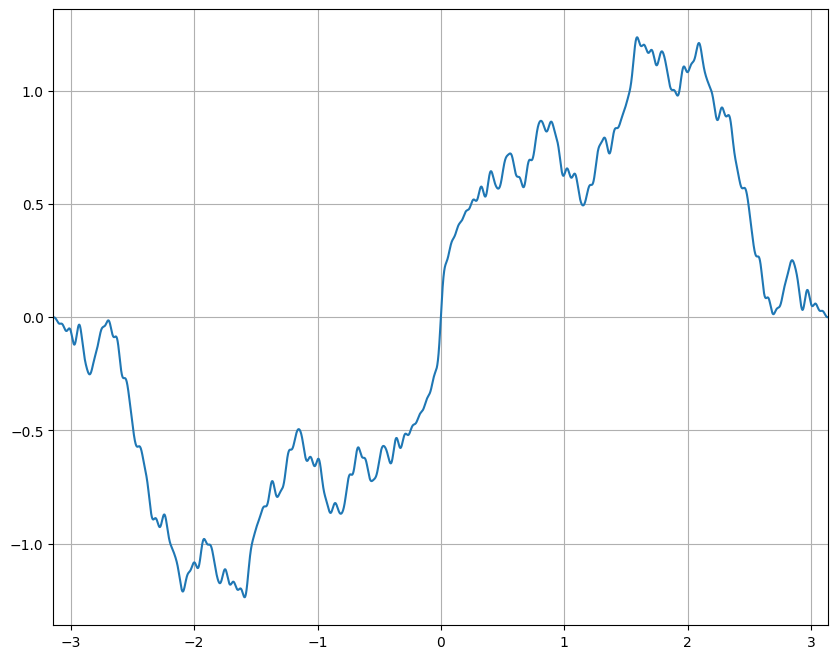

In [29]:
plt.figure(figsize = (10, 8))
plt.grid()
plt.xlim(-np.pi, np.pi)
N = 10
X = np.arange(-np.pi, np.pi, 0.0001)
plt.plot(X, suma(X, N))

Ejercicio 13

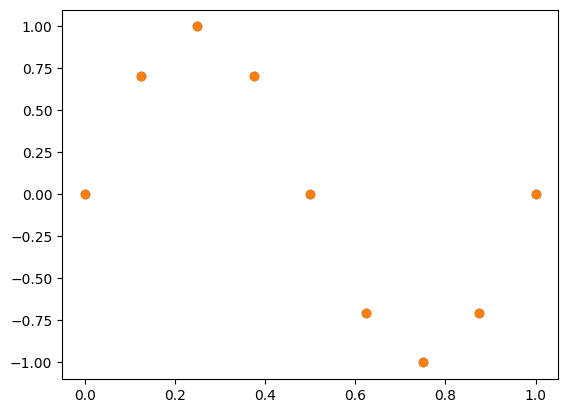

In [30]:
x = np.linspace(0,1,9)
y1 = [np.sin(2*np.pi*t) for t in x]
y2 = [np.sin(18*np.pi*t) for t in x]
plt.scatter(x,y1)
plt.scatter(x,y2)

Como dan iguales me dice que hay alliasing entre las dos funciones en caso de que tome datos con frecuencia 1/8

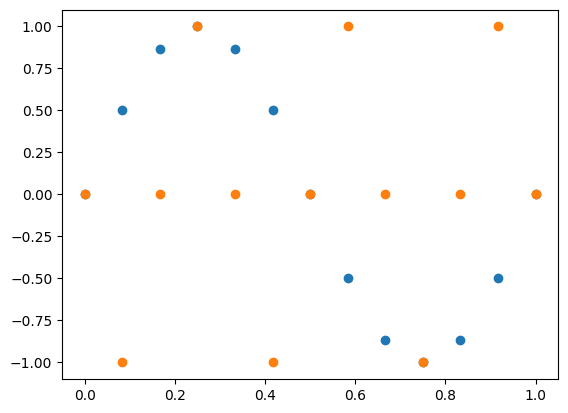

In [31]:
x = np.linspace(0,1,13)
y1 = [np.sin(2*np.pi*t) for t in x]
y2 = [np.sin(18*np.pi*t) for t in x]
plt.scatter(x,y1)
plt.scatter(x,y2)

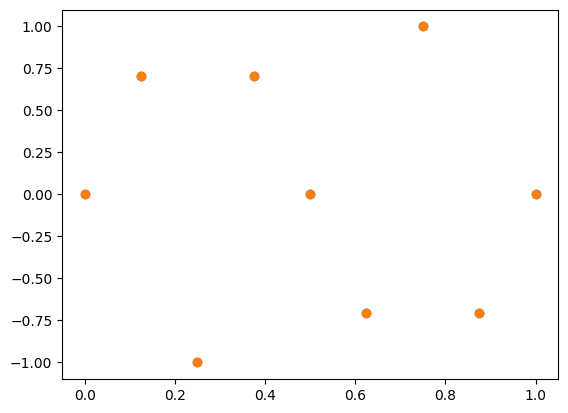

In [32]:
x = np.linspace(0,1,9)
y1 = [np.sin(6*np.pi*t) for t in x]
y2 = [np.sin(38*np.pi*t) for t in x]
plt.scatter(x,y1)
plt.scatter(x,y2)

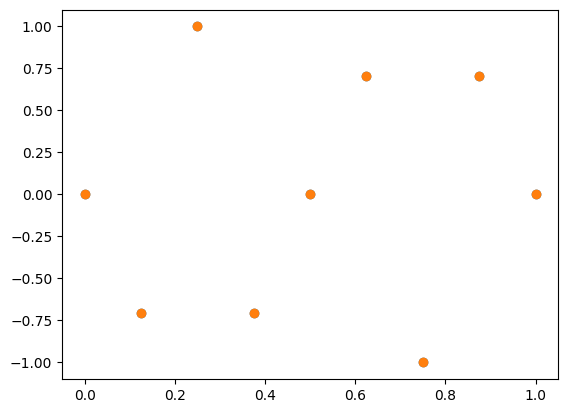

In [33]:
x = np.linspace(0,1,9)
y1 = [np.sin(10*np.pi*t) for t in x]
y2 = [np.sin(-6*np.pi*t) for t in x]
plt.scatter(x,y1)
plt.scatter(x,y2)

En todos los casos hay alliasing, entonces podria estar reconstruyendo mal señales con ciertas frecuencias que son falsas.

Ejercicio 14

In [34]:
def fourier_disc(v):
    N = len(v)
    v_f = []
    for k in range(0, N):
        v_k = 0
        for i in range(0, N):
            v_k += np.exp(-i*k*2*np.pi*1j/N)*v[i]
        if np.isclose(v_k, 0):
            v_k = 0
        v_f.append(v_k)
    return v_f

In [35]:
x = np.array([1, 1, 1, 1])
y = fft(x)
y

array([4.-0.j, 0.+0.j, 0.-0.j, 0.-0.j])

In [36]:
y1 = fourier_disc(x)
print(y1)

[np.complex128(4+0j), 0, 0, 0]


Ejercicio 21

In [37]:
def conv_disc(v, w):
    res = [0 for i in range(len(v)+len(w)-1)]

    for j in range(len(res)):
        suma = 0
        for k in range(len(v)):
            if (j-k >= 0 and j-k < len(w)):
                suma += v[k]*w[j-k]
        res[j] = suma

    return res 

In [38]:
v = [1,2,-1]
w = [3,1,-5,2,-1]
r = conv_disc(v,w)
r

[3, 7, -6, -9, 8, -4, 1]

Ejercicio 22

In [41]:
def conv_four(v, w):
    n = len(v)
    m = len(w)
    for i in range(n, n+m-1):
        v.append(0)
    for i in range(m, n+m-1):
        w.append(0)

    v_f = fft(v)
    w_f = fft(w)

    vw_f = [v_f[i]*w_f[i] for i in range(n+m-1)]

    vw = ifft(vw_f)

    return vw

In [42]:
v = [1,2,-1]
w = [3,1,-5,2,-1]
r = conv_four(v,w)
r

array([ 3.+0.j,  7.+0.j, -6.+0.j, -9.+0.j,  8.+0.j, -4.+0.j,  1.+0.j])